In [1]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as mplt
# Read and shuffle data
city_data = pd.read_csv("raw_data/city_data.csv")
ride_data = pd.read_csv("raw_data/ride_data.csv")


__Observed Trends__<br>
__1.__ Average fare is higher in Rural areas, probably longer trips<br>
__2.__ Ratio of rides to drivers is higher in Rural areas<br>
__3.__ Average fare decreases as the number of rides and drivers increase



In [2]:
# find and keep "Port James" city with 15 ( average of cities that type)
city_df = city_data.drop_duplicates(['city'], keep = 'first')
city_df.loc[city_df['city'] == "Port James"]
ride_df=ride_data
combined_df = pd.merge(ride_df, city_df, on="city", how="inner")
combined_df.head()

,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,Sarabury,2016-07-23 07:42:44,21.76,7546681945283,46,Urban
2,Sarabury,2016-04-02 04:32:25,38.03,4932495851866,46,Urban
3,Sarabury,2016-06-23 05:03:41,26.82,6711035373406,46,Urban
4,Sarabury,2016-09-30 12:48:34,30.30,6388737278232,46,Urban


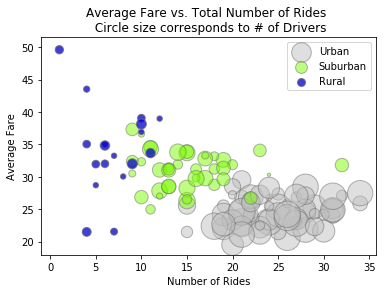

In [5]:
city_calcs_df=pd.DataFrame(combined_df.groupby('city')['type'].value_counts())

pd.DataFrame(combined_df.groupby(['city'])['ride_id'].count())
city_calcs_df.rename(columns = {'type':'Total Rides'}, inplace=True)
city_calcs_df

#append total drivers
drivers_by_city = pd.DataFrame(city_data.groupby('city')['driver_count'].sum())
drivers_by_city.rename(columns = {'driver_count': 'Total Drivers'}, inplace=True)


#merge city type
city_types_df = city_df.set_index('city')
city_types_df = city_df.set_index('city')
city_types_df = city_types_df[['type']]
city_types_df.rename(columns = {'type': 'City Type'}, inplace=True)



#merge avgs

avg_fare_city = pd.DataFrame(combined_df .groupby('city')['fare'].mean())
avg_fare_city.rename(columns = {'fare': 'Avg Fare'}, inplace=True)

#merge city type to non indexed column
city_totals_fnl_df = pd.merge(city_calcs_df,drivers_by_city, left_index = True, right_index = True).merge(avg_fare_city, left_index = True, right_index = True)
city_totals_fnl_df = pd.merge(city_totals_fnl_df,city_types_df, left_index = True, right_index = True)
#create daraframes for scatter plotting
urban_analysis_df = city_totals_fnl_df[city_totals_fnl_df['City Type'] == "Urban"]
suburban_analysis_df =city_totals_fnl_df[city_totals_fnl_df['City Type'] == "Suburban"]
rural_analysis_df =city_totals_fnl_df[city_totals_fnl_df['City Type'] == "Rural"]
#plot each series invdividually
colors = ['silver', 'lawngreen', 'mediumblue']

mplt.scatter(x = urban_analysis_df['Total Rides'], y = urban_analysis_df['Avg Fare'], 
           s = urban_analysis_df['Total Drivers'] * 10, c = colors[0], edgecolors="dimgray",alpha=.5, label = "Urban")
mplt.scatter(x = suburban_analysis_df['Total Rides'], y = suburban_analysis_df['Avg Fare'],
           s = suburban_analysis_df['Total Drivers'] * 10, c = colors[1],edgecolors="dimgray",alpha=.5, label = "Suburban")
mplt.scatter(x = rural_analysis_df['Total Rides'], y = rural_analysis_df['Avg Fare'],
           s = rural_analysis_df['Total Drivers'] * 10, c = colors[2],edgecolors="dimgray",alpha=.75, label = "Rural")
mplt.legend()
mplt.xlabel("Number of Rides")
mplt.ylabel("Average Fare")
mplt.title("Average Fare vs. Total Number of Rides \n Circle size corresponds to # of Drivers")
mplt.savefig("PyberScatter.png")


Text(0.5,1,'% of Total Rides by City Type')

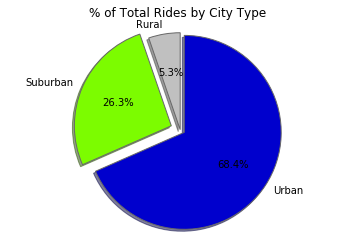

In [6]:

#create dataframe and pie chart for total fares by city type
explode = (0, 0.1, 0.05)
total_rides_city = pd.DataFrame(combined_df.groupby('type')['ride_id'].nunique())
#total_fares_city
mplt.rcParams['text.color'] = 'k'
mplt.pie(total_rides_city, explode=explode, colors = colors, labels = total_rides_city.index, autopct = "%1.1f%%", startangle = 90,shadow=True,wedgeprops={"edgecolor":"dimgray",'linewidth': 1, 'linestyle': 'solid', 'antialiased': True})

mplt.axis("equal")
mplt.title("% of Total Rides by City Type")

Text(0.5,1,'% of Total Fares by City Type')

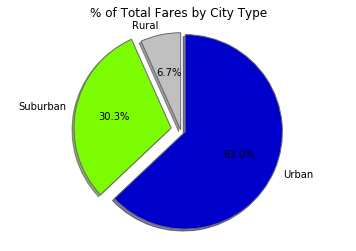

In [7]:

#create dataframe and pie chart for Total Rides by City Type
explode = (0, 0.1, 0.05)
total_fares_city = pd.DataFrame(combined_df.groupby('type')['fare'].sum())
#total_fares_city
mplt.pie(total_fares_city, colors = colors, explode=explode,labels = total_fares_city.index, autopct = "%1.1f%%", startangle = 90,shadow=True,wedgeprops={"edgecolor":"dimgray",'linewidth': 1, 'linestyle': 'solid', 'antialiased': True})
mplt.axis("equal")
mplt.title("% of Total Fares by City Type")

Text(0.5,1,'Driver % by City Type')

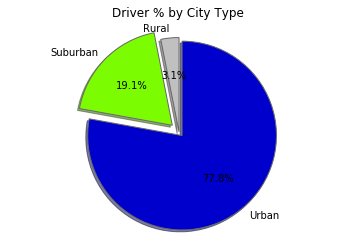

In [8]:
#create dataframe and pie chart for Total drivers City Type
explode = (0, 0.1, 0.05)
total_drivers_city = pd.DataFrame(city_totals_fnl_df.groupby('type')['Total Drivers'].sum())
#total_fares_city
mplt.pie(total_drivers_city, colors = colors, explode=explode,labels = total_fares_city.index, autopct = "%1.1f%%", startangle = 90,shadow=True,wedgeprops={"edgecolor":"dimgray",'linewidth': 1, 'linestyle': 'solid', 'antialiased': True})
mplt.axis("equal")
mplt.title("Driver % by City Type")